<a href="https://colab.research.google.com/github/Fermasango28/Fermasango28/blob/main/ModelamientoSistemasHidraulicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from numpy import arctan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PRIMER SISTEMA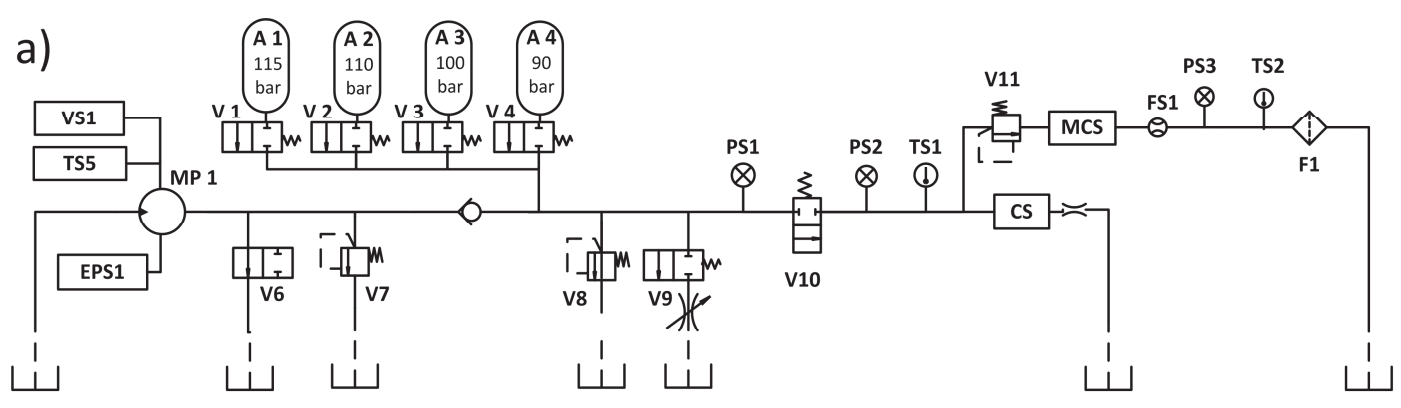

In [ ]:
df_p1 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Sensor_Presion/PS1.txt",header=None, sep="\t")
df_p1.info()
df_p1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 6000 entries, 0 to 5999
dtypes: float64(6000)
memory usage: 100.9 MB


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,151.16,151.19,151.25,151.16,151.10,151.16,151.14,151.10,151.21,151.19
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,150.82,150.82,150.86,150.80,150.73,150.79,150.84,150.79,150.80,150.86
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,150.49,150.44,150.47,150.46,150.38,150.47,150.50,150.43,150.54,150.62
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,150.34,150.30,150.28,150.38,150.41,150.33,150.31,150.31,150.25,150.28
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,150.31,150.20,150.17,150.28,150.31,150.25,150.27,150.22,150.13,150.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,151.70,151.83,151.90,151.75,151.62,151.63,153.78,154.73,153.83,154.43,...,151.84,151.75,151.67,151.76,151.81,151.78,151.78,151.83,151.84,151.86
2201,151.90,151.83,151.81,151.77,151.65,151.63,153.97,154.84,153.67,154.37,...,151.81,151.81,151.84,151.83,151.79,151.87,151.87,151.75,151.77,151.78
2202,151.73,151.78,151.84,151.62,151.46,151.49,153.91,154.88,153.69,154.24,...,151.73,151.66,151.73,151.71,151.68,151.79,151.84,151.73,151.73,151.83
2203,151.77,151.77,151.75,151.56,151.47,151.57,154.09,154.80,153.45,154.21,...,151.75,151.71,151.68,151.71,151.73,151.75,151.71,151.68,151.71,151.78


In [ ]:
df_p2 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Sensor_Presion/PS2.txt",header=None, sep="\t")
df_p2.info()
df_p2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 6000 entries, 0 to 5999
dtypes: float64(6000)
memory usage: 100.9 MB


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,125.50,125.39,125.40,125.03,124.05,123.18,104.01,56.500,23.992,18.406,...,125.02,125.00,125.10,125.09,124.98,124.91,124.98,125.11,125.14,125.10
1,125.06,125.08,125.09,124.69,123.84,123.14,103.63,63.687,28.359,21.711,...,124.80,124.88,125.13,125.22,125.09,124.98,125.06,125.13,125.09,125.04
2,125.13,125.27,125.23,124.74,123.94,123.23,106.35,60.516,26.258,19.258,...,124.61,124.69,124.74,124.71,124.59,124.64,124.74,124.73,124.77,124.88
3,124.93,124.96,124.92,124.41,123.60,122.88,103.99,58.859,27.781,21.469,...,124.82,124.79,124.69,124.69,124.77,124.83,124.69,124.53,124.51,124.59
4,124.72,124.74,124.66,124.31,123.57,122.74,105.94,62.648,30.875,23.883,...,124.80,124.67,124.49,124.56,124.69,124.62,124.45,124.41,124.47,124.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,125.47,125.63,125.70,125.34,124.94,124.88,113.56,71.586,34.516,25.531,...,125.57,125.51,125.38,125.43,125.59,125.61,125.53,125.50,125.60,125.73
2201,125.83,125.70,125.59,125.43,125.18,124.98,114.30,72.531,35.234,26.820,...,125.86,125.77,125.74,125.81,125.77,125.66,125.58,125.58,125.55,125.44
2202,125.41,125.49,125.63,125.38,124.96,124.77,113.69,70.773,32.531,23.773,...,125.66,125.73,125.77,125.81,125.94,126.04,125.98,125.84,125.84,125.94
2203,125.91,125.73,125.59,125.38,125.10,124.96,114.19,74.039,38.695,30.125,...,125.55,125.56,125.58,125.74,125.84,125.73,125.66,125.73,125.86,125.91


In [ ]:
df_p3 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Sensor_Presion/PS3.txt",header=None, sep="\t")
df_p3.info()
df_p3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 6000 entries, 0 to 5999
dtypes: float64(5974), int64(26)
memory usage: 100.9 MB


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,2.305,2.305,2.336,2.578,2.977,3.234,2.414,0.805,0,0,...,2.336,2.391,2.375,2.297,2.328,2.383,2.328,2.250,2.250,2.211
1,2.281,2.320,2.305,2.578,2.945,3.164,2.328,0.742,0,0,...,2.297,2.266,2.266,2.219,2.211,2.266,2.273,2.211,2.195,2.219
2,2.227,2.187,2.156,2.406,2.852,3.109,2.219,0.664,0,0,...,2.359,2.391,2.391,2.375,2.375,2.375,2.305,2.305,2.320,2.266
3,2.320,2.352,2.297,2.500,2.977,3.227,2.328,0.781,0,0,...,2.117,2.219,2.281,2.227,2.164,2.164,2.219,2.250,2.273,2.273
4,2.250,2.250,2.242,2.383,2.758,3.031,2.227,0.719,0,0,...,2.141,2.172,2.187,2.227,2.219,2.211,2.242,2.219,2.227,2.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2.375,2.352,2.359,2.516,2.648,2.625,2.156,0.906,0,0,...,2.328,2.305,2.328,2.359,2.375,2.281,2.242,2.250,2.266,2.273
2201,2.273,2.266,2.352,2.539,2.664,2.742,2.273,0.992,0,0,...,2.273,2.383,2.359,2.297,2.297,2.336,2.406,2.461,2.461,2.406
2202,2.375,2.437,2.359,2.391,2.602,2.680,2.109,0.797,0,0,...,2.227,2.242,2.219,2.211,2.273,2.273,2.250,2.219,2.219,2.250
2203,2.305,2.414,2.469,2.523,2.680,2.711,2.078,0.766,0,0,...,2.328,2.328,2.328,2.281,2.266,2.305,2.281,2.250,2.242,2.281


In [ ]:
df_t1 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Sensor_Temperatura/TS1.txt",header=None, sep="\t")
df_t1.info()
df_t1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2205 non-null   float64
 1   1       2205 non-null   float64
 2   2       2205 non-null   float64
 3   3       2205 non-null   float64
 4   4       2205 non-null   float64
 5   5       2205 non-null   float64
 6   6       2205 non-null   float64
 7   7       2205 non-null   float64
 8   8       2205 non-null   float64
 9   9       2205 non-null   float64
 10  10      2205 non-null   float64
 11  11      2205 non-null   float64
 12  12      2205 non-null   float64
 13  13      2205 non-null   float64
 14  14      2205 non-null   float64
 15  15      2205 non-null   float64
 16  16      2205 non-null   float64
 17  17      2205 non-null   float64
 18  18      2205 non-null   float64
 19  19      2205 non-null   float64
 20  20      2205 non-null   float64
 21  21      2205 non-null   float64
 22  

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,...,36.008,35.984,35.996,36.039,36.008,36.008,36.094,36.102,36.090,36.152
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,...,37.328,37.324,37.340,37.332,37.316,37.410,37.418,37.422,37.488,37.477
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,...,38.457,38.461,38.457,38.469,38.469,38.555,38.527,38.543,38.527,38.621
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,...,39.441,39.363,39.367,39.457,39.461,39.461,39.473,39.441,39.453,39.461
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,...,40.324,40.320,40.312,40.340,40.320,40.387,40.391,40.391,40.387,40.391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,35.414,35.348,35.254,35.262,35.168,35.172,35.105,35.094,35.000,35.008,...,35.426,35.516,35.437,35.426,35.410,35.414,35.414,35.426,35.414,35.414
2201,35.434,35.332,35.266,35.195,35.262,35.195,35.082,35.105,34.988,35.008,...,35.434,35.434,35.449,35.414,35.422,35.414,35.426,35.437,35.402,35.398
2202,35.434,35.355,35.262,35.187,35.266,35.102,35.105,35.094,35.016,35.016,...,35.500,35.434,35.410,35.434,35.426,35.437,35.441,35.410,35.434,35.437
2203,35.449,35.359,35.277,35.184,35.195,35.184,35.105,35.016,35.012,35.008,...,35.437,35.531,35.426,35.516,35.422,35.441,35.461,35.414,35.426,35.441


In [ ]:
df_t2 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Sensor_Temperatura/TS2.txt",header=None, sep="\t")
df_t2.info()
df_t2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2205 non-null   float64
 1   1       2205 non-null   float64
 2   2       2205 non-null   float64
 3   3       2205 non-null   float64
 4   4       2205 non-null   float64
 5   5       2205 non-null   float64
 6   6       2205 non-null   float64
 7   7       2205 non-null   float64
 8   8       2205 non-null   float64
 9   9       2205 non-null   float64
 10  10      2205 non-null   float64
 11  11      2205 non-null   float64
 12  12      2205 non-null   float64
 13  13      2205 non-null   float64
 14  14      2205 non-null   float64
 15  15      2205 non-null   float64
 16  16      2205 non-null   float64
 17  17      2205 non-null   float64
 18  18      2205 non-null   float64
 19  19      2205 non-null   float64
 20  20      2205 non-null   float64
 21  21      2205 non-null   float64
 22  

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,40.961,40.949,40.965,40.922,40.879,40.879,40.828,40.812,40.809,40.785,...,41.211,41.129,41.195,41.211,41.207,41.191,41.207,41.207,41.129,41.250
1,41.258,41.277,41.262,41.223,41.211,41.176,41.129,41.129,41.070,41.031,...,41.949,41.941,41.980,41.957,41.980,42.020,42.023,42.031,42.078,42.105
2,42.129,42.105,42.117,42.066,42.031,41.969,41.926,41.867,41.867,41.855,...,42.887,42.887,42.906,42.941,42.930,42.934,42.973,42.988,43.039,43.035
3,43.039,43.043,43.039,43.000,42.957,42.887,42.879,42.879,42.875,42.809,...,43.879,43.879,43.891,43.883,43.895,43.961,43.934,43.949,43.961,43.988
4,44.031,44.027,43.988,43.961,43.895,43.879,43.895,43.836,43.805,43.742,...,44.766,44.801,44.805,44.789,44.859,44.848,44.863,44.871,44.887,44.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,40.937,40.922,40.918,40.879,40.879,40.828,40.809,40.812,40.809,40.789,...,40.957,40.961,40.965,40.961,40.937,40.922,40.926,40.937,40.918,40.922
2201,40.910,40.891,40.906,40.871,40.812,40.812,40.816,40.809,40.812,40.801,...,40.957,40.879,40.934,40.965,40.898,40.957,40.934,40.906,40.883,40.891
2202,40.906,40.898,40.898,40.879,40.816,40.812,40.824,40.824,40.816,40.809,...,40.973,40.957,40.973,40.961,40.949,40.937,40.949,40.922,40.906,40.898
2203,40.906,40.906,40.891,40.895,40.855,40.816,40.812,40.828,40.812,40.812,...,40.934,40.961,40.957,40.926,40.898,40.934,40.910,40.926,40.918,40.898


In [ ]:
df_f1 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Sensor_Caudal/FS1.txt",header=None, sep="\t")
df_f1.info()
df_f1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 600 entries, 0 to 599
dtypes: float64(600)
memory usage: 10.1 MB


,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,...,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,...,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,...,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,...,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,...,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,8.173,1.024,0.834,0.009,0.000,0.001,0.000,0.003,0.001,0.000,...,7.904,7.777,7.938,7.841,7.741,8.004,7.869,7.719,8.003,7.874
2201,8.317,0.883,0.799,0.008,0.005,0.000,0.000,0.000,0.000,0.001,...,7.766,7.957,7.817,7.739,8.036,7.871,7.647,7.993,7.898,7.787
2202,8.170,0.686,0.583,0.011,0.000,0.003,0.004,0.000,0.000,0.000,...,7.898,7.648,7.953,7.871,7.859,7.921,7.770,7.982,7.859,7.685
2203,8.496,0.543,0.366,0.009,0.005,0.000,0.000,0.000,0.001,0.003,...,7.834,7.737,8.065,7.893,7.653,7.971,7.898,7.758,7.892,7.793


In [ ]:
df_vs1 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Otros_Sensores/VIBRACION(VS1).txt",header=None, sep="\t")
df_vs1.info()
df_vs1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2205 non-null   float64
 1   1       2205 non-null   float64
 2   2       2205 non-null   float64
 3   3       2205 non-null   float64
 4   4       2205 non-null   float64
 5   5       2205 non-null   float64
 6   6       2205 non-null   float64
 7   7       2205 non-null   float64
 8   8       2205 non-null   float64
 9   9       2205 non-null   float64
 10  10      2205 non-null   float64
 11  11      2205 non-null   float64
 12  12      2205 non-null   float64
 13  13      2205 non-null   float64
 14  14      2205 non-null   float64
 15  15      2205 non-null   float64
 16  16      2205 non-null   float64
 17  17      2205 non-null   float64
 18  18      2205 non-null   float64
 19  19      2205 non-null   float64
 20  20      2205 non-null   float64
 21  21      2205 non-null   float64
 22  

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.604,0.605,0.611,0.603,0.608,0.608,0.608,0.617,0.619,0.619,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,0.590,0.610,0.626,0.620,0.623,0.619,0.617,0.618,0.619,0.615,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,0.578,0.603,0.638,0.651,0.652,0.662,0.662,0.656,0.652,0.638,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,0.565,0.591,0.608,0.614,0.623,0.645,0.642,0.645,0.642,0.643,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,0.570,0.600,0.623,0.636,0.644,0.642,0.651,0.654,0.660,0.644,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.558,0.584,0.600,0.602,0.617,0.617,0.618,0.613,0.618,0.612,...,0.532,0.526,0.521,0.515,0.518,0.519,0.518,0.525,0.522,0.527
2201,0.566,0.569,0.577,0.578,0.577,0.573,0.577,0.578,0.578,0.584,...,0.534,0.535,0.529,0.526,0.531,0.536,0.541,0.536,0.530,0.544
2202,0.566,0.562,0.561,0.567,0.576,0.580,0.575,0.585,0.590,0.597,...,0.533,0.526,0.527,0.521,0.509,0.516,0.516,0.512,0.515,0.517
2203,0.529,0.539,0.552,0.552,0.550,0.553,0.567,0.560,0.560,0.585,...,0.538,0.527,0.524,0.522,0.514,0.519,0.526,0.522,0.520,0.528


In [ ]:
df_eps1 = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/Otros_Sensores/POT_MOTOR(EPS1).txt",header=None, sep="\t")
df_eps1.info()
df_eps1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 6000 entries, 0 to 5999
dtypes: float64(6000)
memory usage: 100.9 MB


,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2411.6,2409.6,...,2409.6,2409.2,2409.6,2409.4,2409.6,2409.4,2409.6,2409.6,2409.6,2409.6
1,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,2409.6,...,2398.8,2398.2,2398.2,2398.0,2398.0,2398.0,2398.0,2397.8,2397.8,2397.8
2,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2397.8,2395.8,...,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8
3,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2383.8,2382.8,2382.8,...,2373.2,2372.8,2372.6,2372.4,2372.2,2372.0,2372.0,2372.0,2372.0,2372.0
4,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2372.0,2373.0,...,2370.0,2370.0,2369.8,2369.8,2369.8,2369.8,2369.6,2369.6,2369.6,2369.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,2416.4,...,2415.6,2415.2,2415.6,2415.4,2415.6,2415.4,2415.6,2415.6,2415.6,2415.6
2201,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,2415.6,...,2414.6,2414.6,2414.0,2414.0,2413.8,2413.8,2413.6,2413.6,2413.6,2413.6
2202,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,...,2413.6,2413.6,2412.6,2413.6,2413.2,2413.6,2413.4,2413.6,2413.4,2413.6
2203,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,2413.6,...,2413.8,2413.8,2413.8,2414.8,2415.8,2415.2,2415.6,2415.4,2415.6,2415.6


In [ ]:
df_sal = pd.read_csv("/content/drive/MyDrive/Trabajo_AD/Sensores/profile.txt",header=None, sep="\t")
df_sal.columns = ['Cooler(C1)','Valve(V10)','PumpLeakage','Accumulator','StableFlag']
df_sal = df_sal.drop(columns = ['Cooler(C1)'])
df_sal.info()
df_sal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Valve(V10)   2205 non-null   int64
 1   PumpLeakage  2205 non-null   int64
 2   Accumulator  2205 non-null   int64
 3   StableFlag   2205 non-null   int64
dtypes: int64(4)
memory usage: 69.0 KB


,Valve(V10),PumpLeakage,Accumulator,StableFlag
0,100,0,130,1
1,100,0,130,1
2,100,0,130,1
3,100,0,130,1
4,100,0,130,1
...,...,...,...,...
2200,100,0,90,0
2201,100,0,90,0
2202,100,0,90,0
2203,100,0,90,0


Verificamos el diagrama hidráulico 1 para la exploracion de la data. Se visualizará la muestra 0, que tiene

!["Diagrama hidráulico 1 del proyecto"](https://drive.google.com/uc?id=1uIrcfR2adv_d_DJ2cfEIZt2G_P5bRQYB)


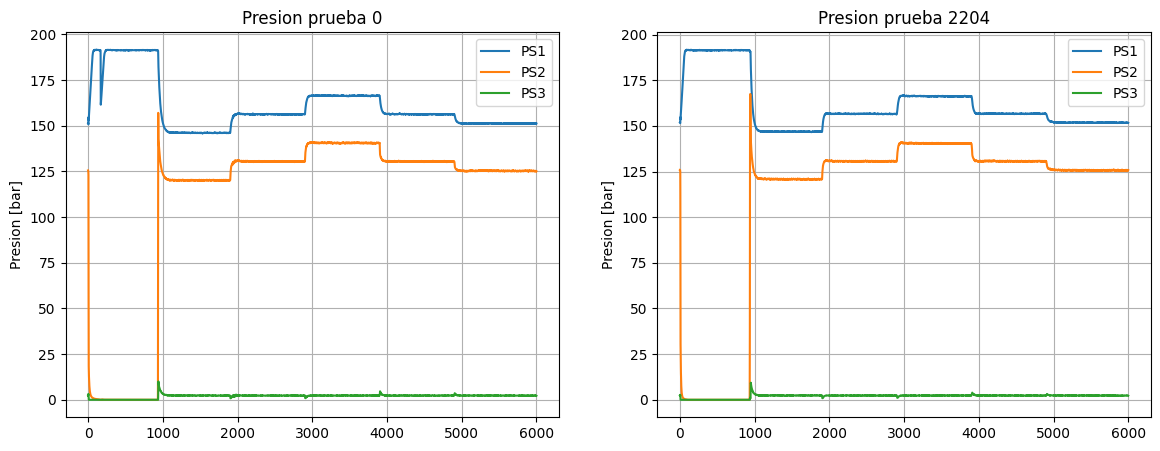

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_p1.loc[0,:])
plt.plot(df_p2.loc[0,:])
plt.plot(df_p3.loc[0,:])
plt.legend(['PS1','PS2','PS3'])
plt.grid()
plt.title('Presion prueba 0')
plt.ylabel('Presion [bar]')
plt.subplot(1,2,2)
plt.plot(df_p1.loc[2204,:])
plt.plot(df_p2.loc[2204,:])
plt.plot(df_p3.loc[2204,:])
plt.legend(['PS1','PS2','PS3'])
plt.grid()
plt.title('Presion prueba 2204')
plt.ylabel('Presion [bar]')
plt.savefig('Presion_sin.png')

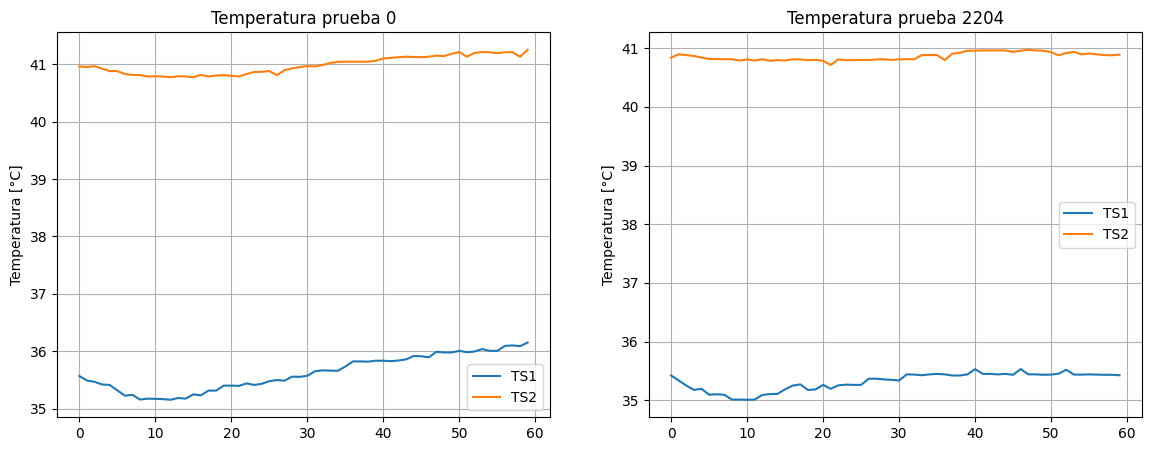

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_t1.loc[0,:])
plt.plot(df_t2.loc[0,:])
plt.legend(['TS1','TS2'])
plt.title('Temperatura prueba 0')
plt.grid()
plt.ylabel('Temperatura [°C]')
plt.subplot(1,2,2)
plt.plot(df_t1.loc[2204,:])
plt.plot(df_t2.loc[2204,:])
plt.legend(['TS1','TS2'])
plt.title('Temperatura prueba 2204')
plt.grid()
plt.ylabel('Temperatura [°C]')
plt.savefig('Temp_sin.png')

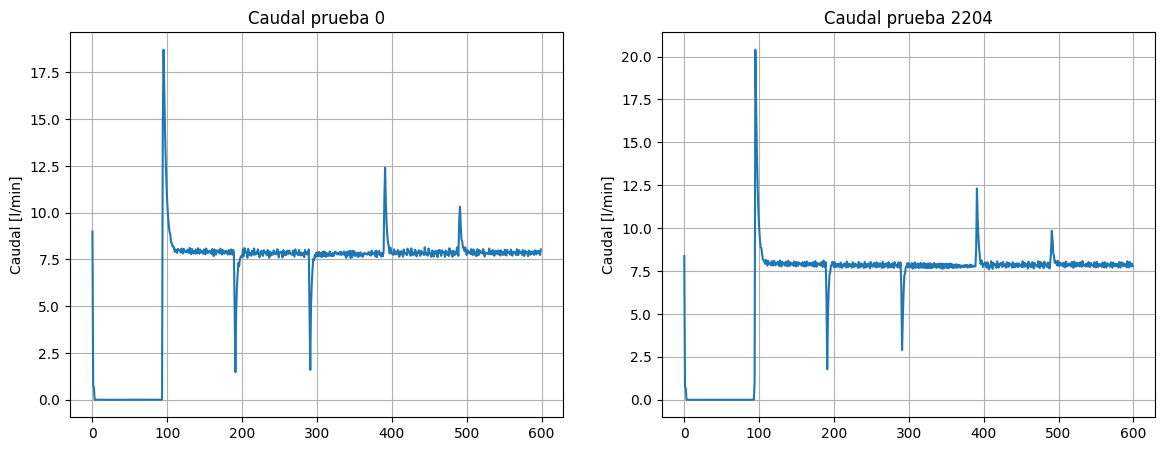

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_f1.loc[0,:])
plt.title('Caudal prueba 0')
plt.grid()
plt.ylabel('Caudal [l/min]')
plt.subplot(1,2,2)
plt.plot(df_f1.loc[2204,:])
plt.title('Caudal prueba 2204')
plt.grid()
plt.ylabel('Caudal [l/min]')
plt.savefig('Caudal_sin.png')

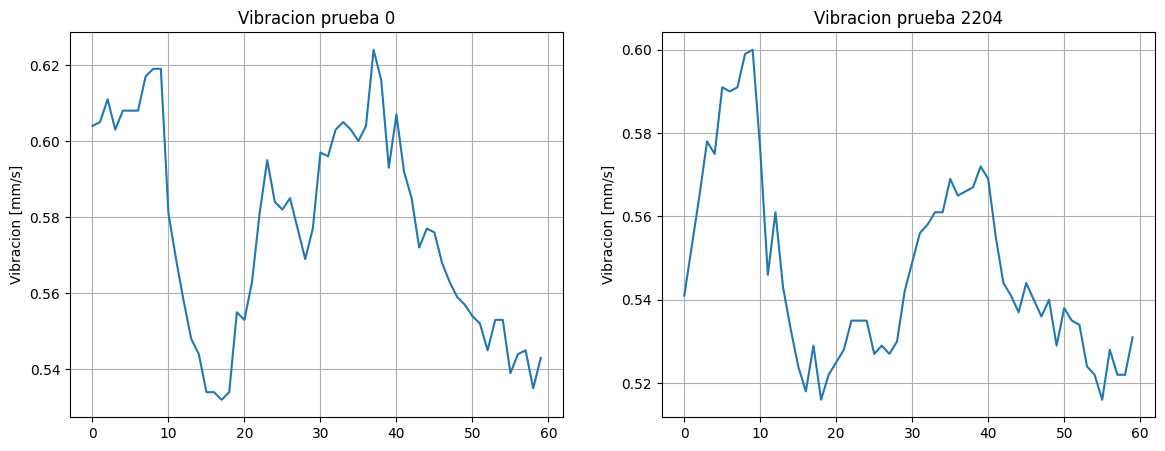

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_vs1.loc[0,:])
plt.title('Vibracion prueba 0')
plt.grid()
plt.ylabel('Vibracion [mm/s]')
plt.subplot(1,2,2)
plt.plot(df_vs1.loc[2204,:])
plt.title('Vibracion prueba 2204')
plt.grid()
plt.ylabel('Vibracion [mm/s]')
plt.savefig('Vib_sin.png')

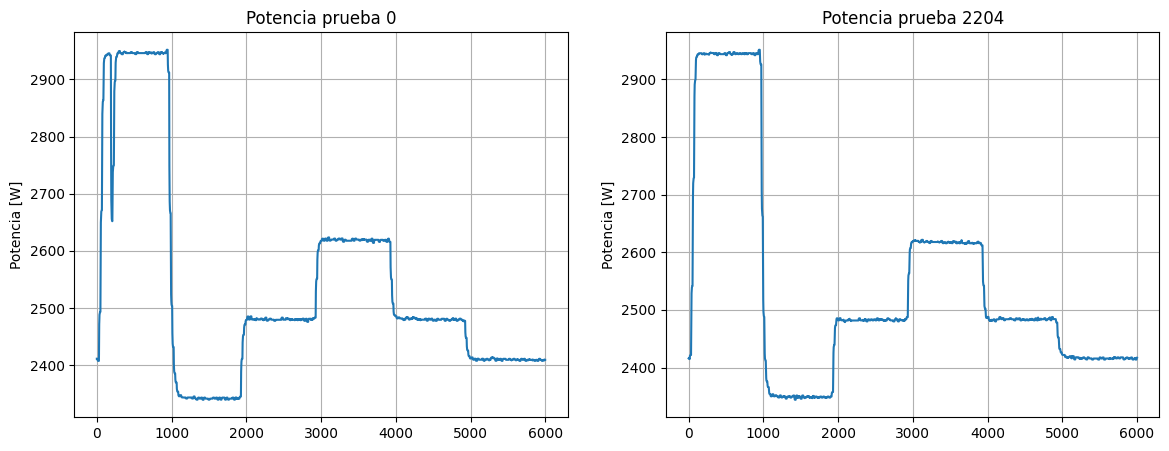

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(df_eps1.loc[0,:])
plt.title('Potencia prueba 0')
plt.grid()
plt.ylabel('Potencia [W]')
plt.subplot(1,2,2)
plt.plot(df_eps1.loc[2204,:])
plt.title('Potencia prueba 2204')
plt.grid()
plt.ylabel('Potencia [W]')
plt.savefig('Pot_sin.png')



*   De las 2 anteriores imagenes, que tiene diferente estabilidad, podemos ver que el comportamiento transitorio y en estado estable de los parámetros de pruebas bastante similares.
*   Ahora verificamos la distribucion de datos de los valores de salida o los datos a predecir.




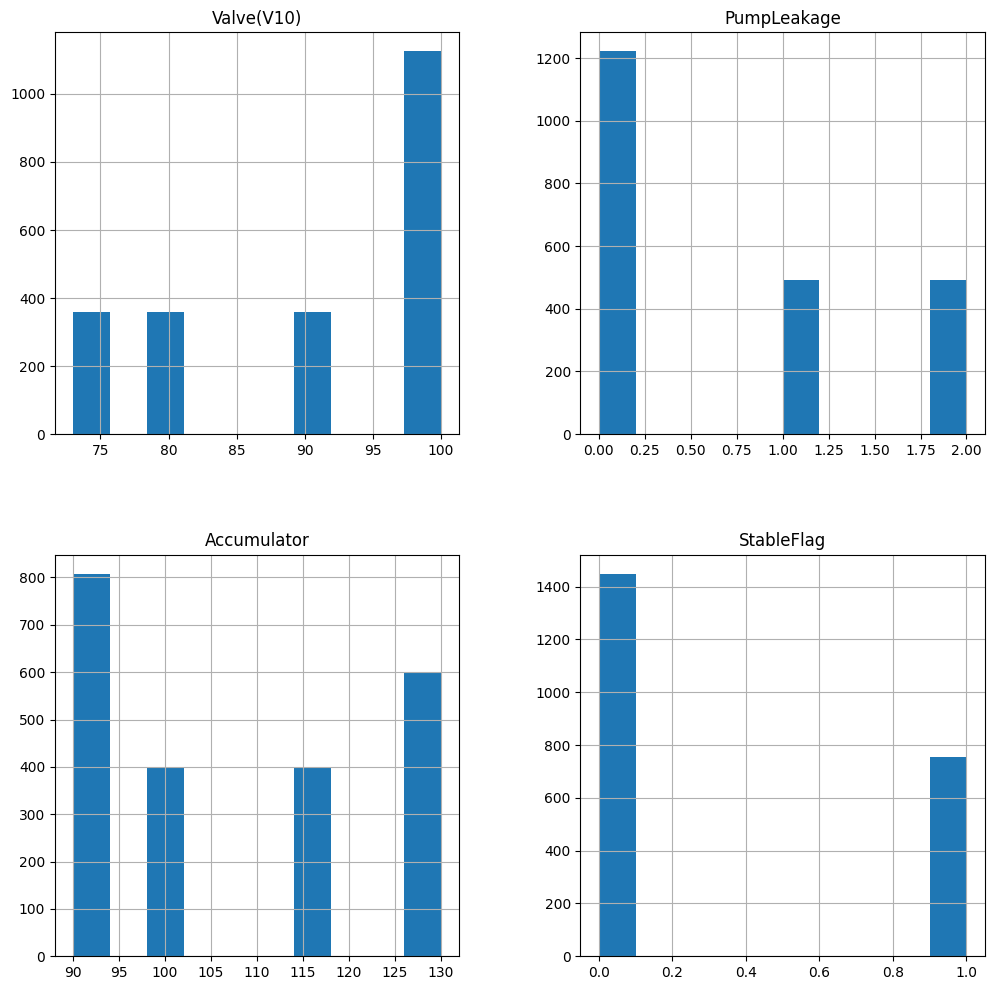

In [ ]:
df_sal.hist(bins=10, figsize=(12, 12), xlabelsize='10', ylabelsize='10')
plt.savefig('Salida_sin.png')

Debido a que se tiene gran cantidad de datos, se uniformizarán las datas a 60 datos por parámetro de medición, por lo que los sensores de presion y caudal se tomará el promedio de 10 en cada 10 muestras, mientras que el de potencia se tomará el promedio de 100 en cada 100 muestras. Esta diferenciacion es debido a que en la presion se tiene picos transitorios que si se reduce mucho se perderían estos datos.

In [ ]:
df = df_sal

In [ ]:
lista = np.zeros ((len(df_p1),  int((len(df_p1.columns))/10)))
suma = 0
cuenta = 0
nombre = 0
for j in range (0,len(df_p1)):
  for i in range(0,len(df_p1.columns)):
    suma = suma + df_p1[i][j]
    cuenta = cuenta + 1
    if cuenta == 10:
      promedio = suma/10
      lista[j][nombre] = promedio
      suma = 0
      cuenta = 0
      nombre = nombre + 1
  nombre = 0

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_p1.columns))/10)):
  nombre = 'p1_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1

In [ ]:
df_ps1=pd.DataFrame(lista,columns=lista_nombre)
df_ps1

,p1_0,p1_1,p1_2,p1_3,p1_4,p1_5,p1_6,p1_7,p1_8,p1_9,...,p1_590,p1_591,p1_592,p1_593,p1_594,p1_595,p1_596,p1_597,p1_598,p1_599
0,152.246,157.179,163.422,170.279,177.552,185.077,189.603,190.950,191.304,191.384,...,151.221,151.142,151.117,151.135,151.162,151.161,151.100,151.045,151.102,151.166
1,151.758,156.137,161.164,166.570,172.471,178.638,184.976,189.215,190.647,191.131,...,150.839,150.849,150.798,150.877,150.842,150.873,150.875,150.812,150.838,150.811
2,151.422,155.863,160.980,166.293,172.141,178.310,184.619,189.002,190.548,191.010,...,150.579,150.540,150.501,150.554,150.507,150.477,150.503,150.487,150.512,150.480
3,151.109,155.458,160.472,165.813,171.649,177.805,184.130,188.776,190.404,190.924,...,150.371,150.347,150.374,150.342,150.307,150.287,150.268,150.274,150.287,150.319
4,150.917,155.240,160.220,165.616,171.397,177.488,183.708,188.495,190.307,190.965,...,150.160,150.115,150.054,150.077,150.161,150.182,150.146,150.242,150.266,150.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,152.720,157.858,164.136,171.149,178.534,185.861,189.952,191.170,191.631,191.728,...,151.797,151.799,151.779,151.822,151.843,151.838,151.735,151.789,151.821,151.792
2201,152.744,157.879,164.256,171.204,178.595,185.936,189.960,191.180,191.574,191.716,...,151.734,151.750,151.703,151.759,151.803,151.764,151.834,151.730,151.730,151.812
2202,152.664,157.831,164.223,171.126,178.477,185.783,189.925,191.137,191.588,191.696,...,151.794,151.811,151.755,151.738,151.816,151.778,151.719,151.733,151.692,151.743
2203,152.644,157.808,164.161,171.149,178.345,185.729,189.934,191.178,191.476,191.657,...,151.676,151.768,151.666,151.612,151.750,151.732,151.710,151.855,151.795,151.721


In [ ]:
lista = np.zeros ((len(df_p2),  int((len(df_p2.columns))/10)))
suma = 0
cuenta = 0
nombre = 0
for j in range (0,len(df_p2)):
  for i in range(0,len(df_p2.columns)):
    suma = suma + df_p2[i][j]
    cuenta = cuenta + 1
    if cuenta == 10:
      promedio = suma/10
      lista[j][nombre] = promedio
      suma = 0
      cuenta = 0
      nombre = nombre + 1
  nombre = 0

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_p2.columns))/10)):
  nombre = 'p2_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1

In [ ]:
df_ps2=pd.DataFrame(lista,columns=lista_nombre)

In [ ]:
lista = np.zeros ((len(df_p3),  int((len(df_p3.columns))/10)))
suma = 0
cuenta = 0
nombre = 0
for j in range (0,len(df_p3)):
  for i in range(0,len(df_p3.columns)):
    suma = suma + df_p3[i][j]
    cuenta = cuenta + 1
    if cuenta == 10:
      promedio = suma/10
      lista[j][nombre] = promedio
      suma = 0
      cuenta = 0
      nombre = nombre + 1
  nombre = 0

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_p3.columns))/10)):
  nombre = 'p3_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1

In [ ]:
df_ps3=pd.DataFrame(lista,columns=lista_nombre)

In [ ]:
lista = np.zeros ((len(df_f1),  int((len(df_f1.columns))/10)))
suma = 0
cuenta = 0
nombre = 0
for j in range (0,len(df_f1)):
  for i in range(0,len(df_f1.columns)):
    suma = suma + df_f1[i][j]
    cuenta = cuenta + 1
    if cuenta == 10:
      promedio = suma/10
      lista[j][nombre] = promedio
      suma = 0
      cuenta = 0
      nombre = nombre + 1
  nombre = 0

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_f1.columns))/10)):
  nombre = 'f1_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1

In [ ]:
df_fs1=pd.DataFrame(lista,columns=lista_nombre)

In [ ]:
lista = np.zeros ((len(df_eps1),  int((len(df_eps1.columns))/100)))
suma = 0
cuenta = 0
nombre = 0
for j in range (0,len(df_eps1)):
  for i in range(0,len(df_eps1.columns)):
    suma = suma + df_eps1[i][j]
    cuenta = cuenta + 1
    if cuenta == 100:
      promedio = suma/100
      lista[j][nombre] = promedio
      suma = 0
      cuenta = 0
      nombre = nombre + 1
  nombre = 0

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_eps1.columns))/100)):
  nombre = 'Pot_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1

In [ ]:
df_pot=pd.DataFrame(lista,columns=lista_nombre)

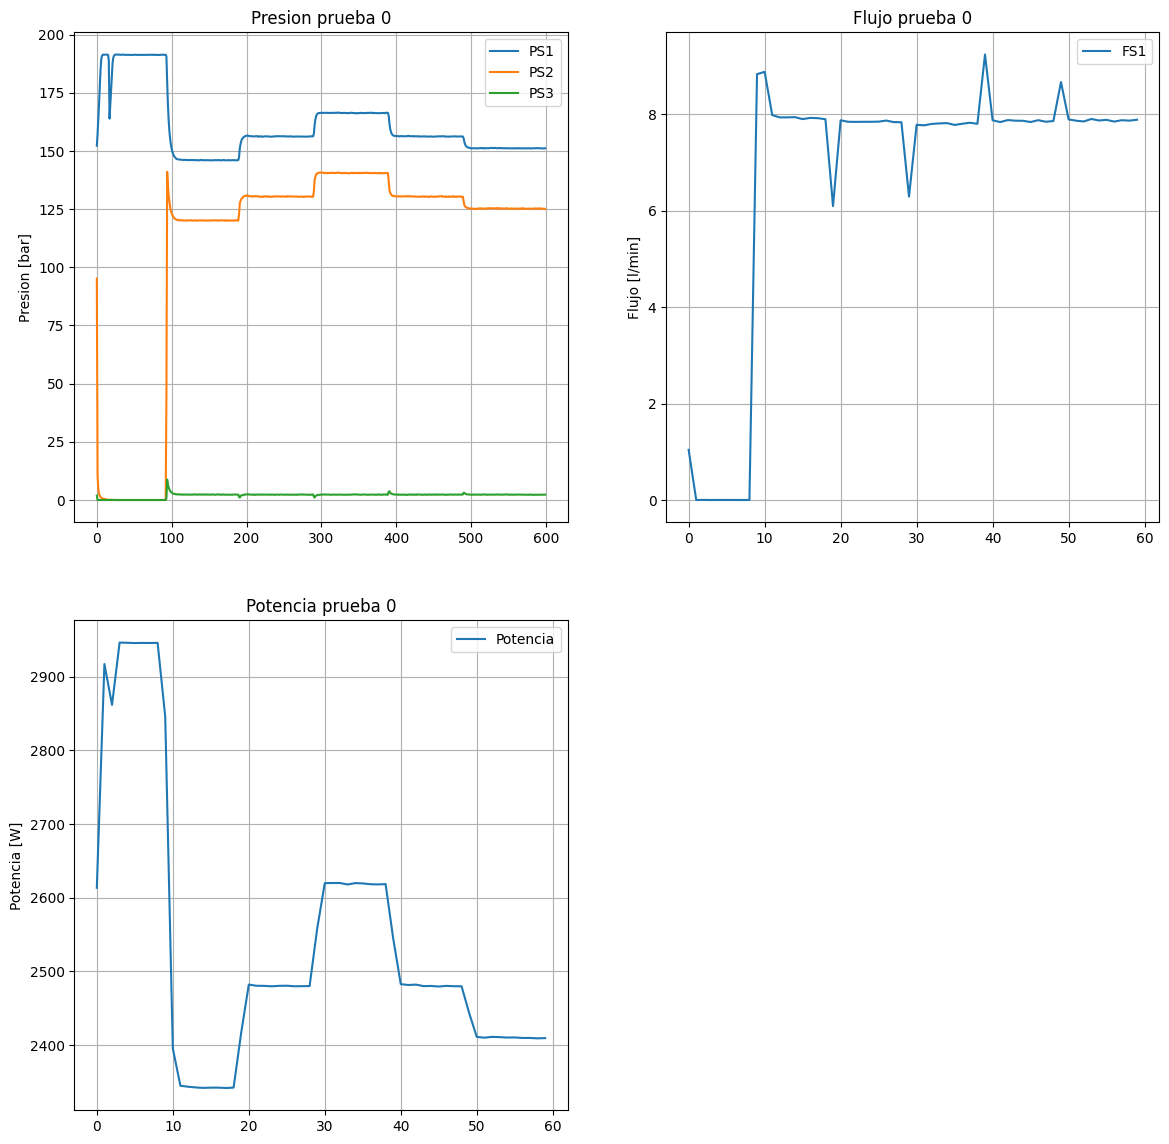

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot(range(600),df_ps1.loc[0,:])
plt.plot(range(600),df_ps2.loc[0,:])
plt.plot(range(600),df_ps3.loc[0,:])
plt.legend(['PS1','PS2','PS3'])
plt.grid()
plt.title('Presion prueba 0')
plt.ylabel('Presion [bar]')
plt.subplot(2,2,2)
plt.plot(range(60),df_fs1.loc[0,:])
plt.legend(['FS1'])
plt.grid()
plt.title('Flujo prueba 0')
plt.ylabel('Flujo [l/min]')
plt.subplot(2,2,3)
plt.plot(range(60),df_pot.loc[0,:])
plt.legend(['Potencia'])
plt.title('Potencia prueba 0')
plt.grid()
plt.ylabel('Potencia [W]')
plt.savefig('Reducido_sin.png')

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_t1.columns)))):
  nombre = 'T1_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1
lista_nombre
df_t1.columns = lista_nombre

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_t2.columns)))):
  nombre = 'T2_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1
lista_nombre
df_t2.columns = lista_nombre

In [ ]:
lista_nombre = []
cuenta = 0
for i in range(int((len(df_vs1.columns)))):
  nombre = 'VS1_'+ str(cuenta)
  lista_nombre.append(nombre)
  cuenta = cuenta + 1
lista_nombre
df_vs1.columns = lista_nombre

In [ ]:
df=pd.concat([df_sal,df_ps1,df_ps2,df_ps3,df_t1,df_t2,df_f1,df_vs1,df_pot],axis=1)
df.columns = df.columns.astype(str)

In [ ]:
df

,Valve(V10),PumpLeakage,Accumulator,StableFlag,p1_0,p1_1,p1_2,p1_3,p1_4,p1_5,...,Pot_50,Pot_51,Pot_52,Pot_53,Pot_54,Pot_55,Pot_56,Pot_57,Pot_58,Pot_59
0,100,0,130,1,152.246,157.179,163.422,170.279,177.552,185.077,...,2411.024,2409.992,2411.054,2410.734,2410.168,2410.304,2409.600,2409.600,2409.070,2409.392
1,100,0,130,1,151.758,156.137,161.164,166.570,172.471,178.638,...,2398.904,2397.600,2398.230,2397.968,2397.946,2396.978,2397.826,2397.144,2397.488,2397.440
2,100,0,130,1,151.422,155.863,160.980,166.293,172.141,178.310,...,2386.576,2384.720,2385.162,2385.488,2384.938,2384.880,2385.318,2385.612,2385.250,2384.546
3,100,0,130,1,151.109,155.458,160.472,165.813,171.649,177.805,...,2379.576,2378.348,2378.804,2377.442,2377.660,2377.666,2376.614,2375.768,2375.642,2375.022
4,100,0,130,1,150.917,155.240,160.220,165.616,171.397,177.488,...,2370.992,2369.740,2369.294,2369.510,2371.490,2370.172,2370.610,2370.692,2370.942,2370.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,100,0,90,0,152.720,157.858,164.136,171.149,178.534,185.861,...,2418.486,2416.396,2415.218,2414.498,2414.936,2415.324,2415.584,2415.308,2414.766,2414.776
2201,100,0,90,0,152.744,157.879,164.256,171.204,178.595,185.936,...,2418.632,2416.518,2415.872,2416.302,2415.994,2415.386,2416.080,2415.396,2415.934,2415.404
2202,100,0,90,0,152.664,157.831,164.223,171.126,178.477,185.783,...,2417.460,2416.404,2416.226,2415.768,2415.370,2415.632,2415.178,2415.512,2415.782,2414.608
2203,100,0,90,0,152.644,157.808,164.161,171.149,178.345,185.729,...,2418.570,2416.704,2417.538,2416.906,2416.990,2416.344,2416.536,2416.820,2415.616,2416.078


In [ ]:
y1 = df['Valve(V10)']
y2 = df['PumpLeakage']
y3 = df['Accumulator']
y4 = df['StableFlag']
x = df.drop(columns = ["Valve(V10)","PumpLeakage","Accumulator","StableFlag"])

In [ ]:
num_selector = make_column_selector(dtype_include='number')
standard_scaler = StandardScaler()
imputer_num = SimpleImputer(strategy="mean")

col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),remainder = 'passthrough')

col_transformer.fit(x)
aux=col_transformer.transform(x)
X_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 2640 entries, pipeline__p1_0 to pipeline__Pot_59
dtypes: float64(2640)
memory usage: 44.4 MB


,pipeline__p1_0,pipeline__p1_1,pipeline__p1_2,pipeline__p1_3,pipeline__p1_4,pipeline__p1_5,pipeline__p1_6,pipeline__p1_7,pipeline__p1_8,pipeline__p1_9,...,pipeline__Pot_50,pipeline__Pot_51,pipeline__Pot_52,pipeline__Pot_53,pipeline__Pot_54,pipeline__Pot_55,pipeline__Pot_56,pipeline__Pot_57,pipeline__Pot_58,pipeline__Pot_59
0,0.743219,0.829327,1.090962,1.364042,1.549166,1.654455,1.453197,1.187257,1.105092,1.071662,...,0.870144,0.877158,0.890594,0.886621,0.889433,0.895789,0.887884,0.889134,0.883103,0.888433
1,0.611632,0.534504,0.466406,0.401783,0.364003,0.317257,0.437271,0.621445,0.686877,0.796885,...,0.711027,0.715500,0.722614,0.719507,0.729633,0.721650,0.733996,0.726288,0.731599,0.731982
2,0.521031,0.456978,0.415512,0.329918,0.287029,0.249141,0.358886,0.551982,0.623859,0.665470,...,0.549180,0.547475,0.551438,0.556137,0.559556,0.563557,0.570514,0.575522,0.571515,0.563202
3,0.436632,0.342388,0.275000,0.205387,0.172268,0.144267,0.251519,0.478280,0.532195,0.572067,...,0.457281,0.464350,0.468156,0.450811,0.464398,0.469287,0.456752,0.446824,0.445834,0.438534
4,0.384860,0.280707,0.205298,0.154278,0.113488,0.078435,0.158862,0.386641,0.470450,0.616597,...,0.344587,0.352056,0.343585,0.346977,0.383727,0.371358,0.378278,0.380462,0.384353,0.378111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.871031,1.021443,1.288453,1.589754,1.778221,1.817270,1.529826,1.259002,1.313244,1.445272,...,0.968108,0.960700,0.945137,0.935894,0.951773,0.961389,0.966096,0.963759,0.957611,0.958908
2201,0.877503,1.027384,1.321645,1.604024,1.792450,1.832845,1.531582,1.262263,1.276961,1.432239,...,0.970025,0.962292,0.953704,0.959509,0.965606,0.962199,0.972579,0.964910,0.972890,0.967129
2202,0.855931,1.013803,1.312517,1.583787,1.764926,1.801071,1.523897,1.248240,1.285872,1.410518,...,0.954638,0.960805,0.958341,0.952519,0.957448,0.965414,0.960790,0.966426,0.970902,0.956709
2203,0.850538,1.007296,1.295368,1.589754,1.734136,1.789857,1.525873,1.261611,1.214579,1.368161,...,0.969211,0.964718,0.975527,0.967416,0.978629,0.974718,0.978539,0.983527,0.968730,0.975951


# REGRESION LINEAL

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_procesado, y1, test_size=0.3,random_state=6)
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train1, y_train1)
train_rl1 = lin_reg.score(X_train1, y_train1)
test_rl1 = lin_reg.score(X_test1, y_test1)
print("La precision de la regresion lineal con la data de entrenamiento es: ",train_rl1)
print("La precision de la regresion lineal con la data de prueba es: ",test_rl1)

La precision de la regresion lineal con la data de entrenamiento es:  1.0
La precision de la regresion lineal con la data de prueba es:  0.9987618402120702


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_procesado, y2, test_size=0.3,random_state=6)
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train2, y_train2)
train_rl2 = lin_reg.score(X_train2, y_train2)
test_rl2 = lin_reg.score(X_test2, y_test2)
print("La precision de la regresion lineal con la data de entrenamiento es: ",train_rl2)
print("La precision de la regresion lineal con la data de prueba es: ",test_rl2)

La precision de la regresion lineal con la data de entrenamiento es:  1.0
La precision de la regresion lineal con la data de prueba es:  0.8783825744586887


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_procesado, y3, test_size=0.3,random_state=6)
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train3, y_train3)
train_rl3 = lin_reg.score(X_train3, y_train3)
test_rl3 = lin_reg.score(X_test3, y_test3)
print("La precision de la regresion lineal con la data de entrenamiento es: ",train_rl3)
print("La precision de la regresion lineal con la data de prueba es: ",test_rl3)

La precision de la regresion lineal con la data de entrenamiento es:  1.0
La precision de la regresion lineal con la data de prueba es:  0.8063624262387683


In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_procesado, y4, test_size=0.3,random_state=6)
lin_reg.fit(X_train4, y_train4)
y_pred_train = lin_reg.predict(X_train4).round()
y_pred = lin_reg.predict(X_test4).round()
for i in range(len(y_pred)):
  if y_pred[i] < 0.5:
    y_pred[i] = 0
  else:
    y_pred[i] = 1
cuenta = 0
for j in range(len(y_train4)):
  if y_pred_train[j] == y_train4.values[j]:
    cuenta = cuenta +1
train_rl4 = cuenta / len(y_train4)
cuenta = 0
for k in range(len(y_test4)):
  if y_pred[k] == y_test4.values[k]:
    cuenta = cuenta +1
test_rl4 = cuenta / len(y_test4)
print("La precision de la regresion lineal con la data de entrenamiento es: ",train_rl4)
print("La precision de la regresion lineal con la data de prueba es: ",test_rl4)

La precision de la regresion lineal con la data de entrenamiento es:  1.0
La precision de la regresion lineal con la data de prueba es:  0.824773413897281


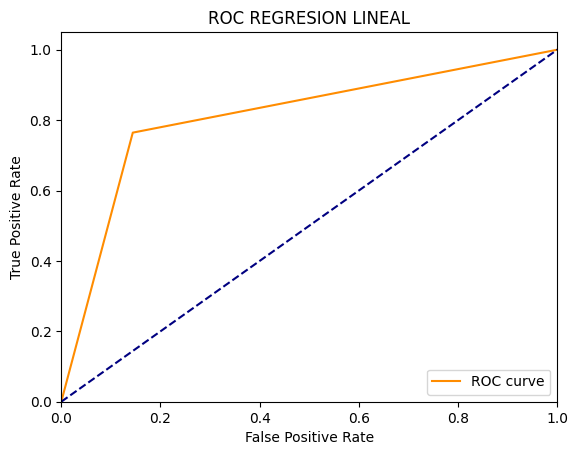

In [ ]:
y = pd.DataFrame(y_test4)
y['y_pred_LR'] = y_pred
scores = [['Y_test',y['StableFlag'].value_counts()[0],0,0,y['StableFlag'].value_counts()[1]]]
matriz = confusion_matrix(y_test4,y_pred)
scores.append(['LR',matriz[0][0],matriz[1][0],matriz[0][1],matriz[1][1]])
fpr, tpr, thresholds = roc_curve(y_test4, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC REGRESION LINEAL')
plt.legend(loc="lower right")
plt.show()

In [ ]:
parametros = [{'max_depth':np.arange(2,10)}]
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train1, y_train1)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
tree_clf = DecisionTreeClassifier(max_depth=profundidad['max_depth'])
tree_clf.fit(X_train1, y_train1)
y_pred = tree_clf.predict(X_test1)
print("La precision del arbol de decision con la data de entrenamiento es: ",tree_clf.score(X_train1, y_train1))
print("La precision del arbol de decision  con la data de prueba es: ",tree_clf.score(X_test1, y_test1))

La precision del arbol de decision con la data de entrenamiento es:  1.0
La precision del arbol de decision  con la data de prueba es:  1.0


In [ ]:
parametros = [{'max_depth':np.arange(2,10)}]
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train2, y_train2)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
tree_clf = DecisionTreeClassifier(max_depth=profundidad['max_depth'])
tree_clf.fit(X_train2, y_train2)
y_pred = tree_clf.predict(X_test2)
print("La precision del arbol de decision con la data de entrenamiento es: ",tree_clf.score(X_train2, y_train2))
print("La precision del arbol de decision  con la data de prueba es: ",tree_clf.score(X_test2, y_test2))

La precision del arbol de decision con la data de entrenamiento es:  0.998703823720026
La precision del arbol de decision  con la data de prueba es:  0.9682779456193353


In [ ]:
parametros = [{'max_depth':np.arange(2,10)}]
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train3, y_train3)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
tree_clf = DecisionTreeClassifier(max_depth=profundidad['max_depth'])
tree_clf.fit(X_train3, y_train3)
y_pred = tree_clf.predict(X_test3)
print("La precision del arbol de decision con la data de entrenamiento es: ",tree_clf.score(X_train3, y_train3))
print("La precision del arbol de decision  con la data de prueba es: ",tree_clf.score(X_test3, y_test3))

La precision del arbol de decision con la data de entrenamiento es:  0.9850939727802981
La precision del arbol de decision  con la data de prueba es:  0.9093655589123867


In [ ]:
parametros = [{'max_depth':np.arange(2,10)}]
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train4, y_train4)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
tree_clf = DecisionTreeClassifier(max_depth=profundidad['max_depth'])
tree_clf.fit(X_train4, y_train4)
y_pred = tree_clf.predict(X_test4)
print("La precision del arbol de decision con la data de entrenamiento es: ",tree_clf.score(X_train4, y_train4))
print("La precision del arbol de decision  con la data de prueba es: ",tree_clf.score(X_test4, y_test4))

La precision del arbol de decision con la data de entrenamiento es:  0.9902786779001944
La precision del arbol de decision  con la data de prueba es:  0.9516616314199395


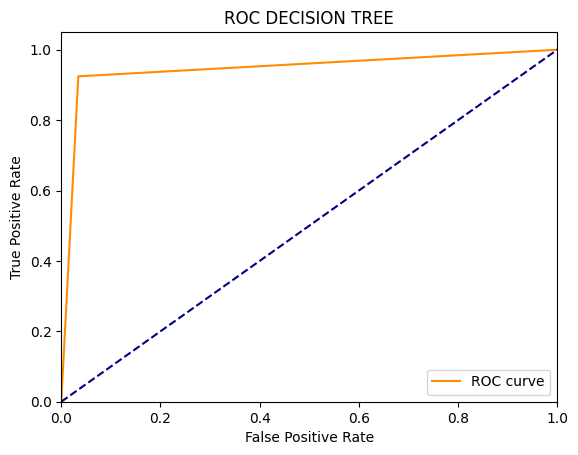

In [ ]:
y['y_pred_DTC'] = y_pred
matriz = confusion_matrix(y_test4,y_pred)
scores.append(['DTC',matriz[0][0],matriz[1][0],matriz[0][1],matriz[1][1]])
fpr, tpr, thresholds = roc_curve(y_test4, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC DECISION TREE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
parametros = [{'max_depth':[2,5,10,50,100],'n_estimators':[2,5,10,50,100]}]
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train1, y_train1)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
rf_clf = RandomForestClassifier(max_depth=profundidad['max_depth'],n_estimators=profundidad['n_estimators'])
rf_clf.fit(X_train1, y_train1)
y_pred = rf_clf.predict(X_test1)
print("La precision del arbol de decision con la data de entrenamiento es: ",rf_clf.score(X_train1, y_train1))
print("La precision del arbol de decision  con la data de prueba es: ",rf_clf.score(X_test1, y_test1))

La precision del arbol de decision con la data de entrenamiento es:  1.0
La precision del arbol de decision  con la data de prueba es:  0.9984894259818731


In [ ]:
parametros = [{'max_depth':[2,5,10,50,100],'n_estimators':[2,5,10,50,100]}]
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train2, y_train2)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
rf_clf = RandomForestClassifier(max_depth=profundidad['max_depth'],n_estimators=profundidad['n_estimators'])
rf_clf.fit(X_train2, y_train2)
y_pred = rf_clf.predict(X_test2)
print("La precision del arbol de decision con la data de entrenamiento es: ",rf_clf.score(X_train2, y_train2))
print("La precision del arbol de decision  con la data de prueba es: ",rf_clf.score(X_test2, y_test2))

La precision del arbol de decision con la data de entrenamiento es:  1.0
La precision del arbol de decision  con la data de prueba es:  0.9954682779456193


In [ ]:
parametros = [{'max_depth':[2,5,10,50,100],'n_estimators':[2,5,10,50,100]}]
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train3, y_train3)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
rf_clf = RandomForestClassifier(max_depth=profundidad['max_depth'],n_estimators=profundidad['n_estimators'])
rf_clf.fit(X_train3, y_train3)
y_pred = rf_clf.predict(X_test3)
print("La precision del arbol de decision con la data de entrenamiento es: ",rf_clf.score(X_train3, y_train3))
print("La precision del arbol de decision  con la data de prueba es: ",rf_clf.score(X_test3, y_test3))

La precision del arbol de decision con la data de entrenamiento es:  1.0
La precision del arbol de decision  con la data de prueba es:  0.9954682779456193


In [ ]:
parametros = [{'max_depth':[2,5,10,50,100],'n_estimators':[2,5,10,50,100]}]
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train4, y_train4)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
rf_clf = RandomForestClassifier(max_depth=profundidad['max_depth'],n_estimators=profundidad['n_estimators'])
rf_clf.fit(X_train4, y_train4)
y_pred = rf_clf.predict(X_test4)
print("La precision del arbol de decision con la data de entrenamiento es: ",rf_clf.score(X_train4, y_train4))
print("La precision del arbol de decision  con la data de prueba es: ",rf_clf.score(X_test4, y_test4))

La precision del arbol de decision con la data de entrenamiento es:  1.0
La precision del arbol de decision  con la data de prueba es:  0.9682779456193353


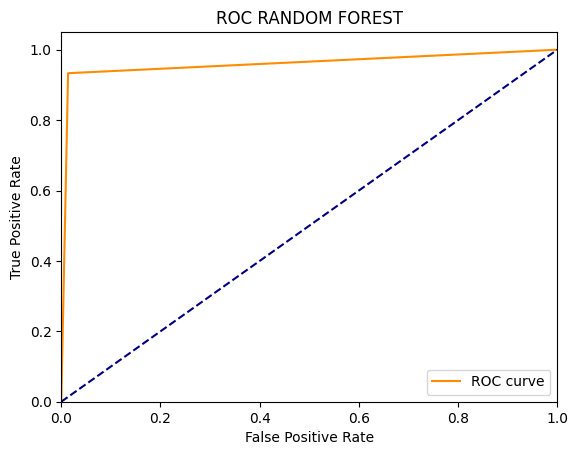

In [ ]:
y['y_pred_RFC'] = y_pred
matriz = confusion_matrix(y_test4,y_pred)
scores.append(['RFC',matriz[0][0],matriz[1][0],matriz[0][1],matriz[1][1]])
fpr, tpr, thresholds = roc_curve(y_test4, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RANDOM FOREST')
plt.legend(loc="lower right")
plt.show()

In [ ]:
parametros = [{'n_neighbors':np.arange(2,10)}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train1, y_train1)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
knn_clf = KNeighborsClassifier(n_neighbors=profundidad['n_neighbors'])
knn_clf.fit(X_train1, y_train1)
y_pred = knn_clf.predict(X_test1)
print("La precision del arbol de decision con la data de entrenamiento es: ",knn_clf.score(X_train1, y_train1))
print("La precision del arbol de decision  con la data de prueba es: ",knn_clf.score(X_test1, y_test1))

La precision del arbol de decision con la data de entrenamiento es:  0.9189889825016202
La precision del arbol de decision  con la data de prueba es:  0.877643504531722


In [ ]:
parametros = [{'n_neighbors':np.arange(2,10)}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train2, y_train2)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
knn_clf = KNeighborsClassifier(n_neighbors=profundidad['n_neighbors'])
knn_clf.fit(X_train2, y_train2)
y_pred = knn_clf.predict(X_test2)
print("La precision del arbol de decision con la data de entrenamiento es: ",knn_clf.score(X_train2, y_train2))
print("La precision del arbol de decision  con la data de prueba es: ",knn_clf.score(X_test2, y_test2))

La precision del arbol de decision con la data de entrenamiento es:  0.9779650032404407
La precision del arbol de decision  con la data de prueba es:  0.9712990936555891


In [ ]:
parametros = [{'n_neighbors':np.arange(2,10)}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train3, y_train3)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
knn_clf = KNeighborsClassifier(n_neighbors=profundidad['n_neighbors'])
knn_clf.fit(X_train3, y_train3)
y_pred = knn_clf.predict(X_test3)
print("La precision del arbol de decision con la data de entrenamiento es: ",knn_clf.score(X_train3, y_train3))
print("La precision del arbol de decision  con la data de prueba es: ",knn_clf.score(X_test3, y_test3))

La precision del arbol de decision con la data de entrenamiento es:  0.8684381075826313
La precision del arbol de decision  con la data de prueba es:  0.7114803625377644


In [ ]:
parametros = [{'n_neighbors':np.arange(2,10)}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train4, y_train4)
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
knn_clf = KNeighborsClassifier(n_neighbors=profundidad['n_neighbors'])
knn_clf.fit(X_train4, y_train4)
y_pred = knn_clf.predict(X_test4)
print("La precision del arbol de decision con la data de entrenamiento es: ",knn_clf.score(X_train4, y_train4))
print("La precision del arbol de decision  con la data de prueba es: ",knn_clf.score(X_test4, y_test4))

La precision del arbol de decision con la data de entrenamiento es:  0.948152948801037
La precision del arbol de decision  con la data de prueba es:  0.9305135951661632


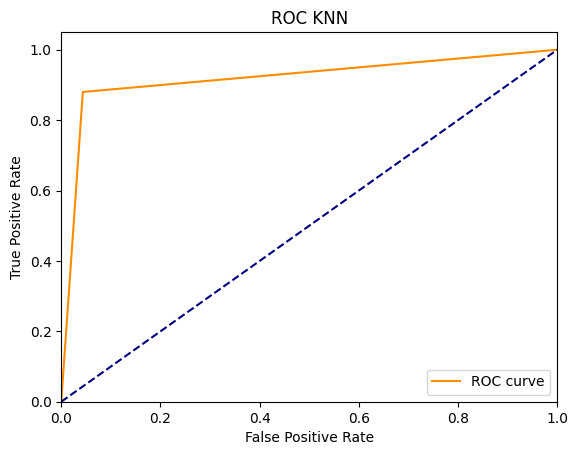

In [ ]:
y['y_pred_KNN'] = y_pred
matriz = confusion_matrix(y_test4,y_pred)
scores.append(['KNN',matriz[0][0],matriz[1][0],matriz[0][1],matriz[1][1]])
fpr, tpr, thresholds = roc_curve(y_test4, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
parametros = [{'C':[0.01,0.1,1,2,5,10]}]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train1, y_train1);
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
log_reg = LogisticRegression(C=profundidad['C'])
log_reg.fit(X_train1, y_train1)
y_pred = log_reg.predict(X_test1)
print("La precision del arbol de decision con la data de entrenamiento es: ",log_reg.score(X_train1, y_train1))
print("La precision del arbol de decision  con la data de prueba es: ",log_reg.score(X_test1, y_test1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

In [ ]:
parametros = [{'C':[0.01,0.1,1,2,5,10]}]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train2, y_train2);
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
log_reg = LogisticRegression(C=profundidad['C'])
log_reg.fit(X_train2, y_train2)
y_pred = log_reg.predict(X_test2)
print("La precision del arbol de decision con la data de entrenamiento es: ",log_reg.score(X_train2, y_train2))
print("La precision del arbol de decision  con la data de prueba es: ",log_reg.score(X_test2, y_test2))

In [ ]:
parametros = [{'C':[0.01,0.1,1,2,5,10]}]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train3, y_train3);
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
log_reg = LogisticRegression(C=profundidad['C'])
log_reg.fit(X_train3, y_train3)
y_pred = log_reg.predict(X_test3)
print("La precision del arbol de decision con la data de entrenamiento es: ",log_reg.score(X_train3, y_train3))
print("La precision del arbol de decision  con la data de prueba es: ",log_reg.score(X_test3, y_test3))

In [ ]:
parametros = [{'C':[0.01,0.1,1,2,5,10]}]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, parametros, cv=5,return_train_score = True)
grid_search.fit(X_train4, y_train4);
resultados = grid_search.cv_results_
score = 0
profundidad = 0
for prof, valor in zip(resultados['params'], resultados['mean_test_score']):
  if valor > score:
    score = valor
    profundidad = prof
log_reg = LogisticRegression(C=profundidad['C'])
log_reg.fit(X_train4, y_train4)
y_pred = log_reg.predict(X_test4)
print("La precision del arbol de decision con la data de entrenamiento es: ",log_reg.score(X_train4, y_train4))
print("La precision del arbol de decision  con la data de prueba es: ",log_reg.score(X_test4, y_test4))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

La precision del arbol de decision con la data de entrenamiento es:  0.9961114711600778
La precision del arbol de decision  con la data de prueba es:  0.9531722054380665


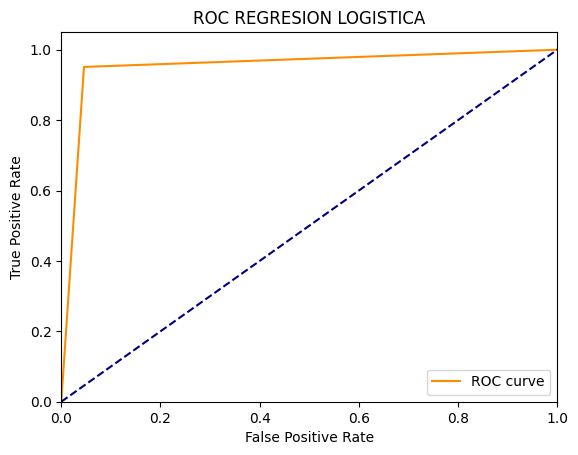

In [ ]:
y['y_pred_LogR'] = y_pred
matriz = confusion_matrix(y_test4,y_pred)
scores.append(['LogR',matriz[0][0],matriz[1][0],matriz[0][1],matriz[1][1]])
fpr, tpr, thresholds = roc_curve(y_test4, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC REGRESION LOGISTICA')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(2500,input_dim = X_train4.shape[1], activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1,activation = "sigmoid"))
model.summary()
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train4, y_train4,validation_data = (X_test4, y_test4), epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2500)              6602500   
                                                                 
 dense_1 (Dense)             (None, 1000)              2501000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9655121 (36.83 MB)
Trainable params: 96551

Text(0.5, 1.0, 'Precision del modelo')

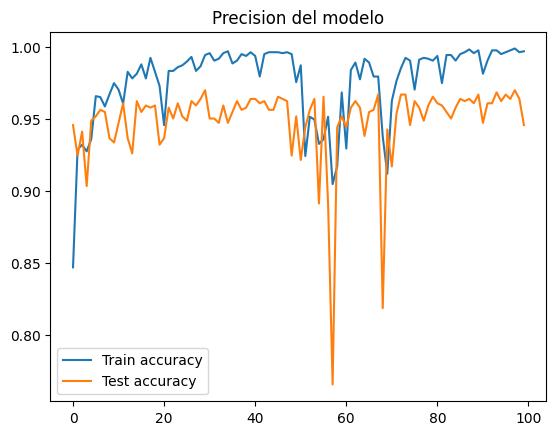

In [ ]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.title("Precision del modelo")

21/21 [==============================] - 1s 27ms/step


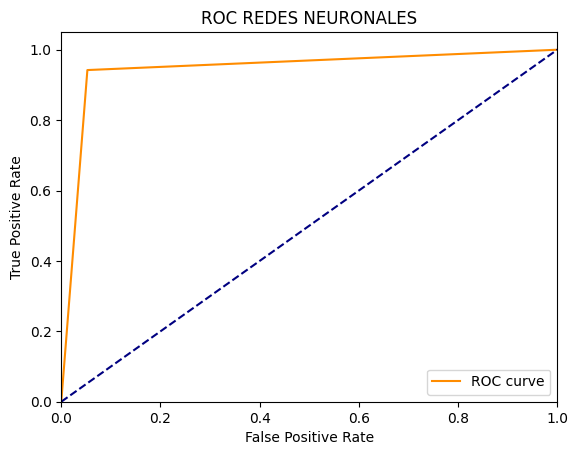

In [ ]:
y_pred = model.predict(X_test4).round()
y['y_pred_RN'] = y_pred
matriz = confusion_matrix(y_test4,y_pred)
scores.append(['RN',matriz[0][0],matriz[1][0],matriz[0][1],matriz[1][1]])
fpr, tpr, thresholds = roc_curve(y_test4, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC REDES NEURONALES')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y

,StableFlag,y_pred_LR,y_pred_DTC,y_pred_RFC,y_pred_KNN,y_pred_LogR,y_pred_RN
500,0,0.0,0,0,0,0,0.0
162,1,1.0,1,1,1,1,1.0
906,1,1.0,1,1,1,1,1.0
665,0,0.0,0,0,0,0,0.0
881,1,0.0,1,1,1,1,1.0
...,...,...,...,...,...,...,...
1076,0,0.0,0,0,0,0,0.0
1006,0,1.0,0,0,0,0,0.0
504,0,0.0,0,0,0,0,0.0
472,1,0.0,1,0,0,1,1.0


In [ ]:
scores = pd.DataFrame(scores,columns=['Modelo','TP','FP','FN','TN'])
scores

,Modelo,TP,FP,FN,TN
0,Y_test,437,0,0,225
1,LR,374,53,63,172
2,DTC,422,17,15,208
3,RFC,431,15,6,210
4,KNN,418,27,19,198
5,LogR,417,11,20,214
6,RN,414,13,23,212


In [ ]:
scores['Accuracy'] = (scores['TP']+scores['TN'])/(scores['TP']+scores['FP']+scores['FN']+scores['TN'])
scores['Precision_1'] = scores['TP']/(scores['TP']+scores['FP'])
scores['Precision_0'] = scores['TN']/(scores['TN']+scores['FN'])
scores['Recall_1'] = scores['TP']/(scores['TP']+scores['FN'])
scores['Recall_0'] = scores['TN']/(scores['TN']+scores['FP'])
scores['F1_1'] = 2*(scores['Precision_1']*scores['Recall_1'])/(scores['Precision_1']+scores['Recall_1'])
scores['F1_0'] = 2*(scores['Precision_0']*scores['Recall_0'])/(scores['Precision_0']+scores['Recall_0'])
scores

,Modelo,TP,FP,FN,TN,Accuracy,Precision_1,Precision_0,Recall_1,Recall_0,F1_1,F1_0
0,Y_test,437,0,0,225,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,LR,374,53,63,172,0.824773,0.875878,0.731915,0.855835,0.764444,0.865741,0.747826
2,DTC,422,17,15,208,0.951662,0.961276,0.932735,0.965675,0.924444,0.963470,0.928571
3,RFC,431,15,6,210,0.968278,0.966368,0.972222,0.986270,0.933333,0.976217,0.952381
4,KNN,418,27,19,198,0.930514,0.939326,0.912442,0.956522,0.880000,0.947846,0.895928
5,LogR,417,11,20,214,0.953172,0.974299,0.914530,0.954233,0.951111,0.964162,0.932462
6,RN,414,13,23,212,0.945619,0.969555,0.902128,0.947368,0.942222,0.958333,0.921739


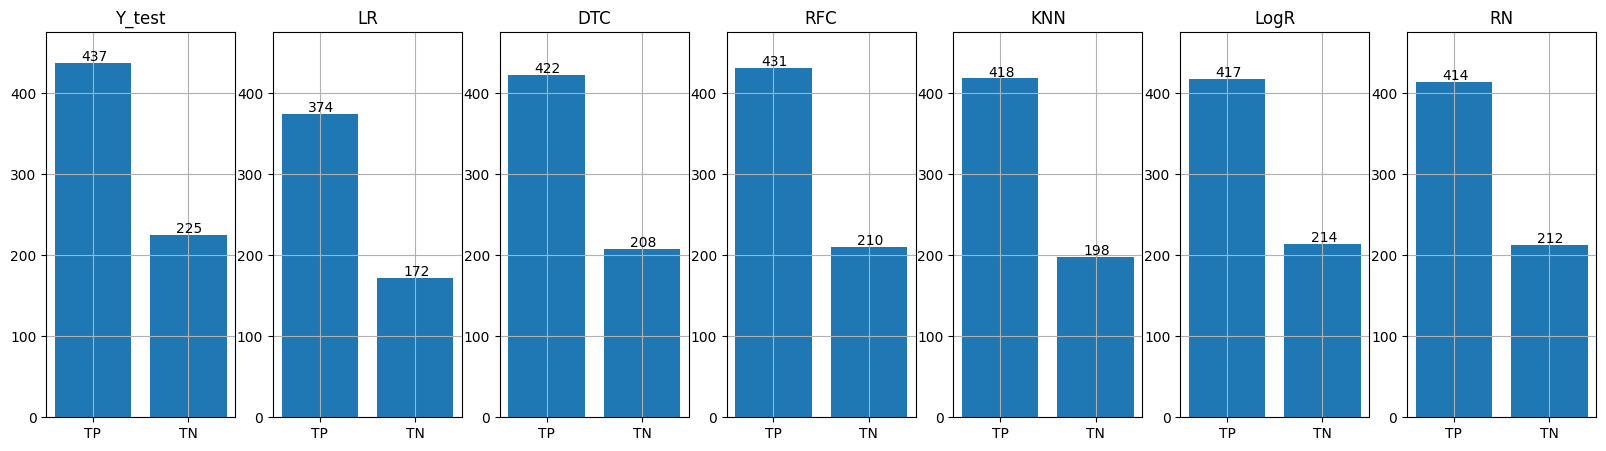

In [ ]:
cuenta = 1
plt.figure(figsize=(20,5))
for i in range(scores.shape[0]):
  plt.subplot(1,7,cuenta)
  plt.bar([0,1],[scores.loc[i,'TP'],scores.loc[i,'TN']])
  plt.xticks([0,1],['TP','TN'])
  plt.text(0-0.125,scores.loc[i,'TP']+2.5,scores.loc[i,'TP'])
  plt.text(1-0.125,scores.loc[i,'TN']+2.5,scores.loc[i,'TN'])
  plt.ylim([0,475])
  plt.grid()
  plt.title(scores.loc[i,'Modelo'])
  cuenta = cuenta +1
plt.savefig('TPTN_sin.png')

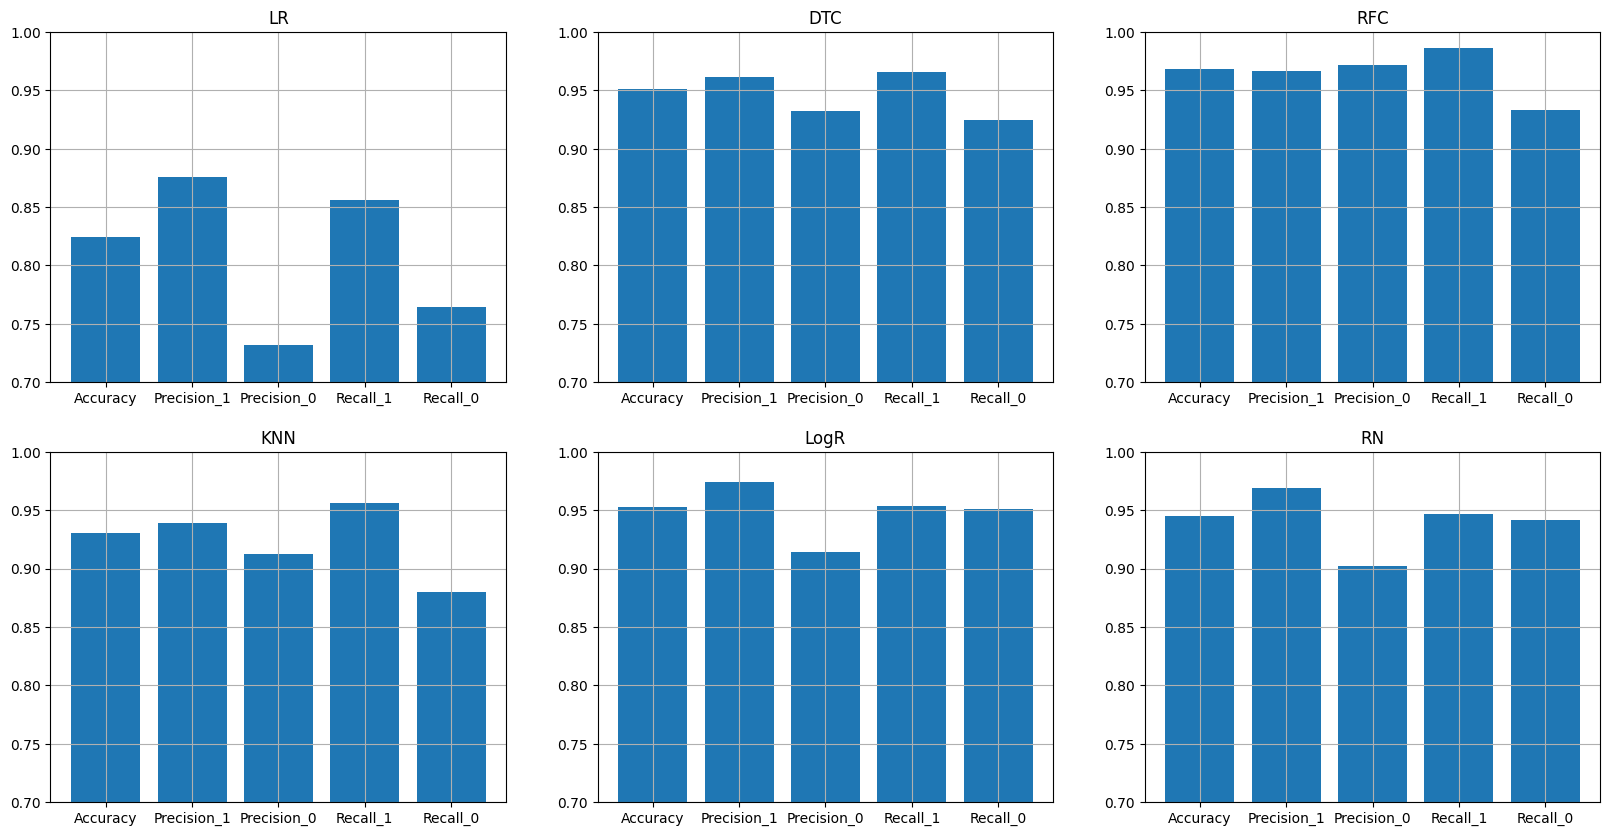

In [ ]:
cuenta = 1
plt.figure(figsize=(20,10))
for i in range(1,scores.shape[0]):
  plt.subplot(2,3,cuenta)
  plt.bar([0,1,2,3,4],[scores.loc[i,'Accuracy'],scores.loc[i,'Precision_1'],scores.loc[i,'Precision_0'],scores.loc[i,'Recall_1'],scores.loc[i,'Recall_0']])
  plt.xticks([0,1,2,3,4],['Accuracy', 'Precision_1','Precision_0', 'Recall_1', 'Recall_0'])
  #plt.text(0-0.125,scores.loc[i,'TP']+2.5,scores.loc[i,'TP'])
  #plt.text(1-0.125,scores.loc[i,'TN']+2.5,scores.loc[i,'TN'])
  plt.ylim([0.7,1])
  plt.grid()
  plt.title(scores.loc[i,'Modelo'])
  cuenta = cuenta +1
plt.savefig('Indicadores_sin.png')

En la primera gráfica podemos visualizar que la cantidad de salidas binarias de los modelos en estudios son bastante cercanas a la de testeo en los True Positive y los True Negative, a exepción del modelo de regresion lineal, con accuracy menor a 0.85. Asimismo, en la segunda gráfica podemos apreciar los indicadores de los 6 modelos en estudio, del cual el modelo de Random Forest ha sido el que mejores indicadores presenta, sin embargo el que mayor Recall 0 tiene es el de regresion logistica, sin embargo tiene poca precision.

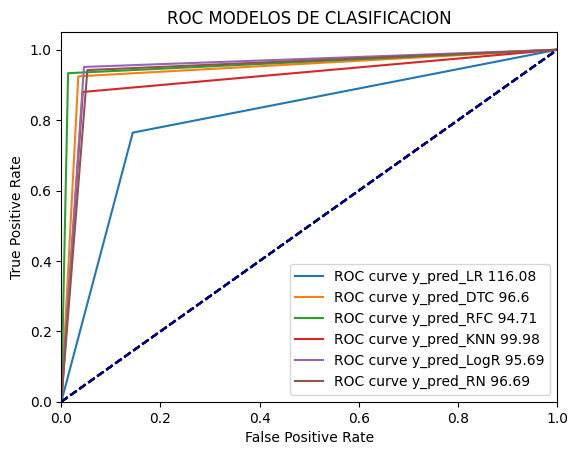

In [ ]:
plt.figure()
for i in y.columns:
  if i != 'StableFlag':
    fpr, tpr, thresholds = roc_curve(y['StableFlag'], y[i])
    angulo1 = arctan(fpr[1]/tpr[1])*(180/3.14)
    angulo2 = arctan((1-tpr[1])/(1-fpr[1]))*(180/3.14)
    angulo=round(angulo1 + angulo2 + 90 ,2)
    plt.plot(fpr, tpr, label= 'ROC curve '+i +' '+str(angulo) )
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC MODELOS DE CLASIFICACION')
plt.savefig('ROC_sin.png')

# CONCLUSIONES
De las gráficas de barras de los indicadores y del diagrama ROC podemos verificar que el modelo Random Forest es el que presenta mejor accuracy de hasta aproximadamente 97%. Sin embargo, desde el punto de confiabilidad mecánica, el modelo regresion logistica nos brinda mayor confiabilidad de encontrar las fallas (Recall 0) de un 95.1% y una disponibilidad mecánica teórica del 96.4%